# Example 2.5

In this example we implement a simple sequential model in Keras.

### Loading the XOR dataset ###

In [ ]:
import numpy as np

class Data:
    def __init__(self, N, sigma):
        self.N=N #Number of data per cluster.
        self.sigma=sigma #standard deviation of the clusters.

    def data_xor(self, classes):
        X=self.sigma*np.random.randn(2,4*self.N) # Generate 4*N random vectors (gaussian) centered around zero
        mean=np.array([[-1,-1, 1, 1],[-1,1,-1,1]]) # define four means
        M=np.ones((self.N,2))*mean[:,0] # Means of the first cluster
        y=np.ones((1,self.N))*classes[0] # Labels of the first cluster
        for i in range(1,4):
            m=np.ones((self.N,2))*mean[:,i] # Means of cluster i
            M=np.concatenate((M,m))     #Concatenate all means
            y=np.concatenate((y,np.ones((1,self.N))*classes[i]),axis=1) # concatenate labels
        M=M.T
        X=X+M # Add means to the data.
        return X,y

#The class definition ends here.

In [ ]:
np.random.seed(30) #allows to reproduce the same results.
N=100; sigma=0.6 #attributes for xor.
classes=[0,1,1,0] #attribute for xor.
T=Data(N,sigma) #define the object corresponding to xor data.
X,y=T.data_xor(classes) #method with instance variable classes.
X=np.transpose(X)
y=np.transpose(y)
y=np.ravel(y)
print(y.shape)
print(X.shape)

(400,)
(400, 2)


### Splitting the data into training and test set ###

In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)

(320, 2) (80, 2)


### Defining the sequential model with dense layers ###

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=4)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                96        
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 129 (516.00 Byte)
Trainable params: 129 (516.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
80/80 [==============================] - 1s 4ms/step - loss: 0.6831 - accuracy: 0.5125 - val_loss: 0.6272 - val_accuracy: 0.6750
Epoch 2/100
80/80 [==============================] - 0s 3ms/step - loss: 0.6011 - accuracy: 0.8250 - val_loss: 0.5699 - val_accuracy: 0.8500
Epoch 3/100
80/80 [==============================] - 0s 3ms/step - loss: 0.5370 - accuracy: 0.9000 - val_loss: 0.5203 - val_accura

### Plotting the training and validation accuracy ###

[]

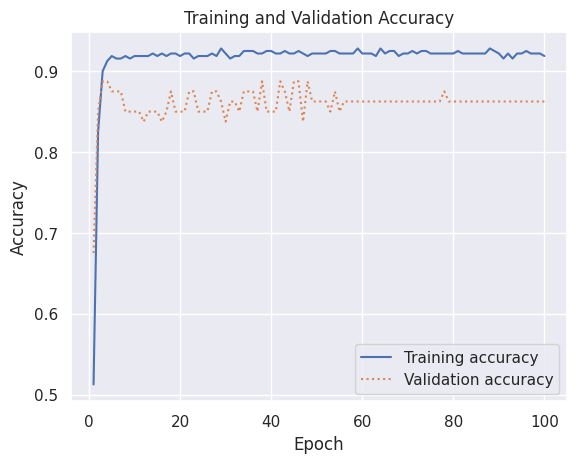

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

### Evaluating the test accuracy ###

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

3/3 [==============================] - 0s 5ms/step - loss: 0.2840 - accuracy: 0.8625
Test accuracy: 0.862500011920929


### Plotting the confusion matrix ###

3/3 [==============================] - 0s 3ms/step


Text(109.44999999999997, 0.5, 'Actual label')

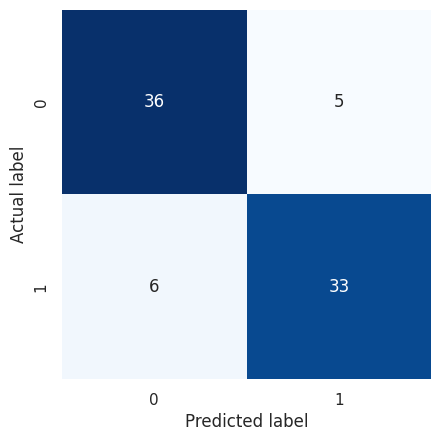

In [ ]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(X_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['0', '1']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

### Keras sequential model on the MNIST dataset ###

For this example, let us load the MNIST dataset and divide it into train and test set. MNIST dataset is the database containing handwritten numbers from 0 to 9. The database has in total of 60000 training samples and 10000 test samples. After loading the data, we move on to the pre-processing step where we first convert the images into vectors and normalize them. Following this the labels are One hot encoded. We can now construct the sequential model with two dense layers. The first dense layer has the number of output units as 512 with ReLU activation function and the second dense layer has 10 output units corresponding to the 10 classes with SoftMax activation function which gives the probabilistic output corresponding to each class. Once the sequential model is created the next step is to compile the model. We can use any optimizer. Let us start with the stochastic gradient descent (SGD) optimizer. The learning rate is initialized to lr=0.01 and the momentum=0.9. The type of loss function used for optimization is the categorical loss function. Next, the model is fit using the training data and labels. The training batch size is initialized to 32, number epochs = 50 and the test data is used as the validation set to check the accuracy over the training. Once the training completes, we can plot the loss function to see how the training and validation loss behaves during the training. Next, we plot the accuracy curves over the epochs. Finally, evaluate the model and print the final accuracy.

In [ ]:
from keras.datasets import mnist
#from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.optimizers import SGD
#Loading the data.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

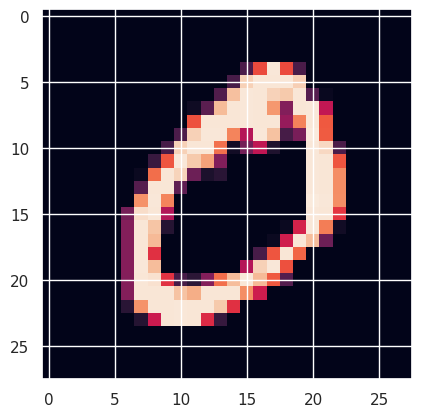

5


In [ ]:
np.shape(x_train)
plt.imshow(x_train[1,:,:])
plt.show()
print(y_test[15])

In [ ]:
#Preprocessing the data
x_train = x_train.reshape((60000, 28 * 28))
train_X = x_train.astype('float32') / 255
x_test = x_test.reshape((10000, 28 * 28))
test_X = x_test.astype('float32') / 255
# One hot encode target values.
train_y = to_categorical(y_train)
test_y = to_categorical(y_test)


In [ ]:
#Define the sequential model.
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(10, activation='softmax'))
#Compile the model.
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_y, epochs=50, batch_size=32, validation_data=(test_X, test_y))


Epoch 1/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2866 - accuracy: 0.9173 - val_loss: 0.1567 - val_accuracy: 0.9527
Epoch 2/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1297 - accuracy: 0.9625 - val_loss: 0.1084 - val_accuracy: 0.9674
Epoch 3/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0897 - accuracy: 0.9744 - val_loss: 0.0845 - val_accuracy: 0.9736
Epoch 4/50
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0685 - accuracy: 0.9806 - val_loss: 0.0753 - val_accuracy: 0.9766
Epoch 5/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0543 - accuracy: 0.9847 - val_loss: 0.0682 - val_accuracy: 0.9788
Epoch 6/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0444 - accuracy: 0.9877 - val_loss: 0.0628 - val_accuracy: 0.9811
Epoch 7/50
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0364 - accuracy: 0.9905 - val_loss: 0.0625 - val_ac

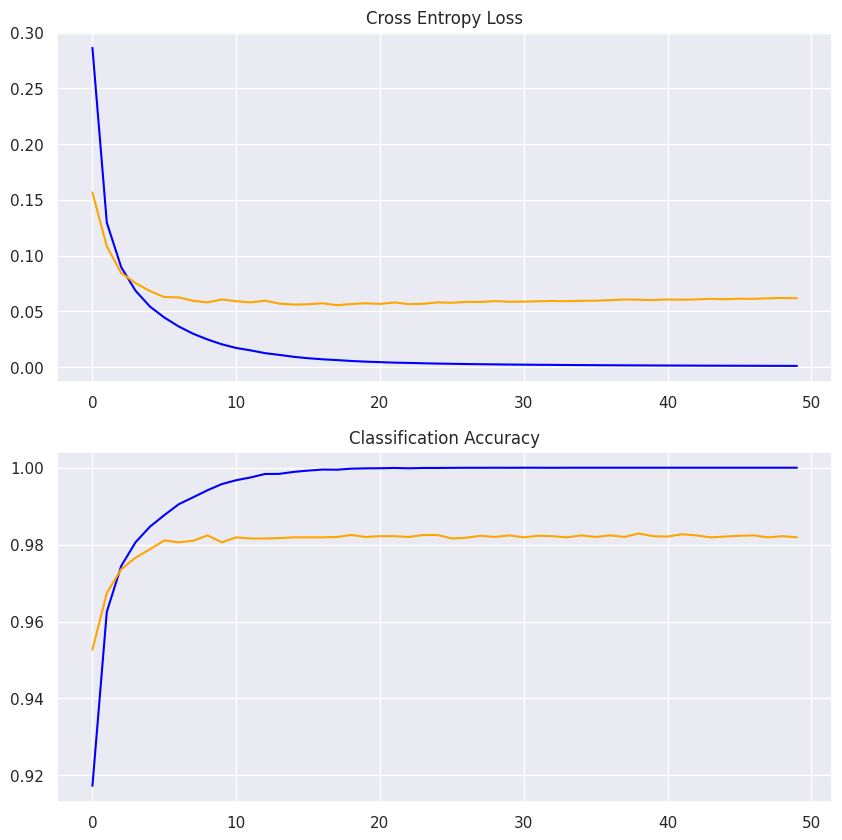

Accuracy 98.190


In [ ]:
plt.figure(figsize=(10,10))
#Plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
# Plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.show()
#Evaluate the final test accuracy.
loss,acc = model.evaluate(test_X, test_y, verbose=0)
print('Accuracy %.3f' % (acc * 100.0))